## Introduction

During the analysis of data, I will be presenting to sell by owner's who want a better idea on what their property value is estimated at within the King County market of Massachusetts. Throughout this notebook, I will be explaining step-by-step what each section of code represents. My goal is to gain your business and trust in myself and abilities to accurately utilize machine learning and linear regression modeling to predict future property listing values based on multiple variables (i.e. # bedrooms, # bathrooms, living sq.ft., etc.)

### Hypothesis

H0: The square footage of a property will not have a significant increase of the price.
H1: The square footage of a house will have a significant increase of the price.

H0: 

## Importing Necessary EDA Tools

In [196]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline
plt.style.use('ggplot')

import scipy.stats as stats

import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## EDA and Cleaning

In [197]:
data=pd.read_csv(('kc_house_data.csv'), index_col=0)
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [198]:
# This output will let me know what columns have null values so I can then clean them up.
# For waterfront and yr_renovated, I will be utilizing the .fillna() function.
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 7129300520 to 1523300157
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     19221 non-null  float64
 8   view           21534 non-null  float64
 9   condition      21597 non-null  int64  
 10  grade          21597 non-null  int64  
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  object 
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   17755 non-null  float64
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float

I see there are two objects that will need to be transformed into an integer or float to manipulate to be user friendly when it comes time to check values of columns and compare with others. I can also see that there are some null values (NaN) that can be cleaned up, having only numerical values in place of them.

In [199]:
data['waterfront'] = data['waterfront'].fillna(0)
data['waterfront'].value_counts()

0.0    21451
1.0      146
Name: waterfront, dtype: int64

In [200]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 7129300520 to 1523300157
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     21597 non-null  float64
 8   view           21534 non-null  float64
 9   condition      21597 non-null  int64  
 10  grade          21597 non-null  int64  
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  object 
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   17755 non-null  float64
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float

In [201]:
data['yr_renovated'] = data['yr_renovated'].fillna('0').astype(str).astype(float)
data['yr_renovated']

id
7129300520       0.0
6414100192    1991.0
5631500400       0.0
2487200875       0.0
1954400510       0.0
               ...  
263000018        0.0
6600060120       0.0
1523300141       0.0
291310100        0.0
1523300157       0.0
Name: yr_renovated, Length: 21597, dtype: float64

In [202]:
data['yr_renovated'] = data['yr_renovated'].replace(0, (data['yr_built']))
data['yr_renovated']

id
7129300520    1955.0
6414100192    1991.0
5631500400    1933.0
2487200875    1965.0
1954400510    1987.0
               ...  
263000018     2009.0
6600060120    2014.0
1523300141    2009.0
291310100     2004.0
1523300157    2008.0
Name: yr_renovated, Length: 21597, dtype: float64

In [203]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 7129300520 to 1523300157
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     21597 non-null  float64
 8   view           21534 non-null  float64
 9   condition      21597 non-null  int64  
 10  grade          21597 non-null  int64  
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  object 
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   21597 non-null  float64
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float

In [204]:
data['sqft_basement']=data['sqft_basement'].astype(str).str.replace('?','0').astype(float)

In [205]:
data['sqft_basement'].value_counts()

0.0       13280
600.0       217
500.0       209
700.0       208
800.0       201
          ...  
915.0         1
295.0         1
1281.0        1
2130.0        1
906.0         1
Name: sqft_basement, Length: 303, dtype: int64

In [206]:
# Removing non-useful variables
data = data.drop('view', 1)
data = data.drop('date', 1)
data = data.drop('lat', 1)
data = data.drop('long', 1)
data = data.drop('zipcode', 1)

In [207]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,
7129300520,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,1180,0.0,1955,1955.0,1340,5650
6414100192,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,2170,400.0,1951,1991.0,1690,7639
5631500400,180000.0,2,1.00,770,10000,1.0,0.0,3,6,770,0.0,1933,1933.0,2720,8062
2487200875,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1050,910.0,1965,1965.0,1360,5000
1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1680,0.0,1987,1987.0,1800,7503


## Testing Simple Linear Regression

### Finding the Regression Line

In [208]:
# Sqft_living vs. Price Regression

X = data['sqft_living']
y = data['price']

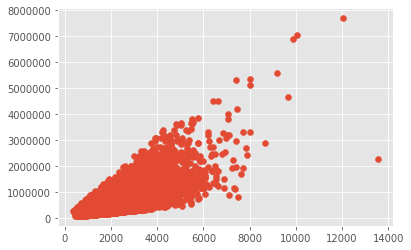

In [209]:
plt.scatter(X, y)

There is a positive correlation between the price of the house and the square footage it has. Logically, you would assume that the bigger the house, the more expensive it would be.

I want to know now what the best fit line looks like to have an idea on average what a house would cost based on the square footage when looking at a new property listing.

In [210]:
def calc_slope(xs, ys):
    m = (((np.mean(xs)*np.mean(ys)) - np.mean(xs*ys)) / ((np.mean(xs)**2) - np.mean(xs*xs)))
    
    return m
calc_slope(X, y)

280.863014358875

In [211]:
def best_fit(xs, ys):
    
    m = calc_slope(xs, ys)
    c = np.mean(ys) - m*np.mean(xs)
    
    return m, c

m, c = best_fit(X, y)
m, c

(280.863014358875, -43988.89219422813)

In [212]:
def reg_line (m, c, xs):
    
    return [(m*x)+c for x in xs]
regression_line = reg_line(m, c, X)

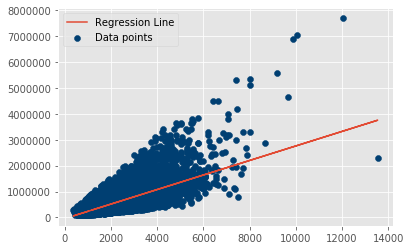

In [213]:
plt.scatter(X, y, color='#003F72', label= 'Data points')
plt.plot(X, regression_line, label= 'Regression Line')
plt.legend()

### Train-Test Split

In [214]:
X = pd.DataFrame(data['sqft_living'])
y = pd.DataFrame(data['price'])

In [215]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
    test_size=0.2, random_state=1)

In [216]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17277, 1)
(4320, 1)
(17277, 1)
(4320, 1)


In [217]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [218]:
print(regressor.intercept_)

[-47064.10945819]


In [219]:
print(regressor.coef_)

[[282.55569813]]


In [220]:
print(regressor.predict)

<bound method LinearModel.predict of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)>


In [221]:
y_hat_train = regressor.predict(X_train)
y_hat_test = regressor.predict(X_test)

In [222]:
y_test

,price
id,
8562000010,244500.0
4363700200,190000.0
8165501620,348500.0
8718500075,396000.0
6154900005,665000.0
...,...
1023059186,252000.0
5423500240,194000.0
6730700260,235000.0


Now that I have my ŷ split between training and testing models, I can look to see how accurate my predictions are. Remember, the closer your Root Means Squared Error (RMSE) is to 0, the more accurate your model is to predicting a new variable.

In [223]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_hat_test)))

Root Mean Squared Error: 253395.9451796438


The result of my RMSE states that my prediction is off by $253,395.95

## Ordinary Least Squares (OLS) Regression Table

When looking at OLS, the biggest takeaways you'll want to keep an eye on: R-squared, P>|t|, and as a gauge, the coefficients of your variables when adding or subtracting other variables(higher or lower values).

In [224]:
# outcome = 'what are you having compared to your variables'
# x_cols = ['listing all variables (columns) to compare against outcome']
# predictors = '+'.join(x_cols)  --aids in segway between outcome and x_cols
# formula = outcome + '~' + predictors  --equation of (THIS being compared to THESE)
# model = ols(formula=formula, data=data).fit()  --imputing formula and DataFrame into OLS
# model.summary()  --overview of results

outcome = 'price'
x_cols = ['floors', 'sqft_living', 'sqft_living15', 'bathrooms', 'bedrooms', 
          'grade', 'yr_built', 'yr_renovated', 'waterfront']
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.645
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     4358.
Date:                Fri, 30 Oct 2020   Prob (F-statistic):               0.00
Time:                        17:09:21   Log-Likelihood:            -2.9621e+05
No. Observations:               21597   AIC:                         5.924e+05
Df Residuals:                   21587   BIC:                         5.925e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      7.129e+06   1.28e+05     55.652      0.000    6.88e+06    7.38e+06
floors          2.11e+04   3449.077      6.119      0.000    1.43e+04    2.79e+04
sqft_living     162.0906      3.592     45.130      0.000     155.051     169.130
sqft_living15    27.8074      3.550      7.834      0.000      20.850      34.765
bathrooms      5.473e+04   3486.501     15.699      0.000    4.79e+04    6.16e+04
bedrooms      -4.037e+04   2045.129    -19.738      0.000   -4.44e+04   -3.64e+04
grade          1.247e+05   2269.653     54.939      0.000     1.2e+05    1.29e+05
yr_built      -4162.7330    136.107    -30.584      0.000   -4429.512   -3895.954
yr_renovated    128.1280    140.181      0.914      0.361    -146.636     402.892
waterfront     7.548e+05   1.84e+04     41.057      0.000    7.19e+05    7.91e+05
==============================================================================
Omnibus:                    16151.663   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1096168.457
Skew:                           3.005   Prob(JB):                         0.00
Kurtosis:                      37.380   Cond. No.                     3.51e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.51e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

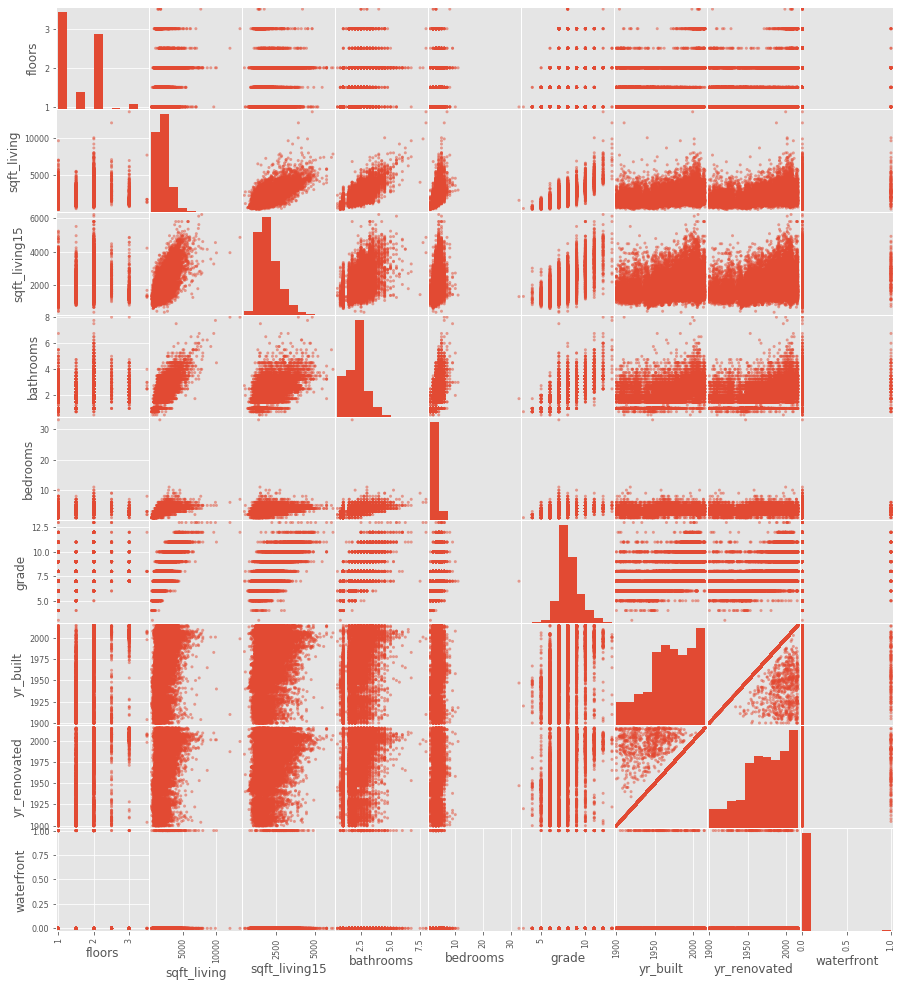

In [225]:
pd.plotting.scatter_matrix(data[x_cols], figsize=(15,17));

Having the scatter plot isn't required but you will be able to get a visual on how the variables compare to one another. I'm looking for which variables have multicollinearity and ones that look categorical.

### Working with Categorical Data

In [226]:
floors_dummies = pd.get_dummies(data['floors'], prefix='floors', drop_first=True)
h2ofront_dummies = pd.get_dummies(data['waterfront'], prefix='H2O', drop_first=True)

In [227]:
floors_dummies.columns = [column.replace('.', '_') for column in floors_dummies.columns]

In [228]:
data_dum = data.drop(['floors', 'waterfront'], axis=1)

In [229]:
data_dum = pd.concat([data_dum, floors_dummies, h2ofront_dummies], axis=1)
data_dum

,price,bedrooms,bathrooms,sqft_living,sqft_lot,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,floors_1_5,floors_2_0,floors_2_5,floors_3_0,floors_3_5,H2O_1.0
id,,,,,,,,,,,,,,,,,,,
7129300520,221900.0,3,1.00,1180,5650,3,7,1180,0.0,1955,1955.0,1340,5650,0,0,0,0,0,0
6414100192,538000.0,3,2.25,2570,7242,3,7,2170,400.0,1951,1991.0,1690,7639,0,1,0,0,0,0
5631500400,180000.0,2,1.00,770,10000,3,6,770,0.0,1933,1933.0,2720,8062,0,0,0,0,0,0
2487200875,604000.0,4,3.00,1960,5000,5,7,1050,910.0,1965,1965.0,1360,5000,0,0,0,0,0,0
1954400510,510000.0,3,2.00,1680,8080,3,8,1680,0.0,1987,1987.0,1800,7503,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263000018,360000.0,3,2.50,1530,1131,3,8,1530,0.0,2009,2009.0,1530,1509,0,0,0,1,0,0
6600060120,400000.0,4,2.50,2310,5813,3,8,2310,0.0,2014,2014.0,1830,7200,0,1,0,0,0,0
1523300141,402101.0,2,0.75,1020,1350,3,7,1020,0.0,2009,2009.0,1020,2007,0,1,0,0,0,0


In [230]:
outcome = 'price'
x_cols = ['bathrooms', 'bedrooms', 'grade', 'h2ofront_dummies', 
          'condition', 'sqft_living', 'sqft_living15', 'yr_built', 'yr_renovated'] + ['floors_1_5', 'floors_2_0', 'floors_2_5', 'floors_3_0', 'floors_3_5']
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=data_dum).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                     2866.
Date:                Fri, 30 Oct 2020   Prob (F-statistic):               0.00
Time:                        17:09:44   Log-Likelihood:            -2.9605e+05
No. Observations:               21597   AIC:                         5.921e+05
Df Residuals:                   21582   BIC:                         5.922e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         6.681e+06    1.5e+05     44.506      0.000    6.39e+06    6.97e+06
bathrooms         5.362e+04   3477.037     15.421      0.000    4.68e+04    6.04e+04
bedrooms         -3.974e+04   2042.755    -19.455      0.000   -4.37e+04   -3.57e+04
grade             1.226e+05   2256.550     54.333      0.000    1.18e+05    1.27e+05
h2ofront_dummies  7.484e+05   1.83e+04     41.000      0.000    7.13e+05    7.84e+05
condition         1.838e+04   2510.038      7.324      0.000    1.35e+04    2.33e+04
sqft_living        164.4018      3.578     45.943      0.000     157.388     171.416
sqft_living15       36.2283      3.560     10.176      0.000      29.250      43.207
yr_built         -4184.6660    136.931    -30.560      0.000   -4453.061   -3916.271
yr_renovated       357.7732    141.349      2.531      0.011      80.718     634.829
floors_1_5       -6854.6759   5713.301     -1.200      0.230   -1.81e+04    4343.816
floors_2_0       -7346.6034   4150.909     -1.770      0.077   -1.55e+04     789.484
floors_2_5        1.238e+05   1.76e+04      7.053      0.000    8.94e+04    1.58e+05
floors_3_0        1.424e+05   9878.872     14.411      0.000    1.23e+05    1.62e+05
floors_3_5        2.507e+05   8.23e+04      3.048      0.002    8.95e+04    4.12e+05
==============================================================================
Omnibus:                    16138.034   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1091931.789
Skew:                           3.002   Prob(JB):                         0.00
Kurtosis:                      37.313   Cond. No.                     4.15e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.15e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Multiple Linear Regression

Since I have a better understanding visually what my data represents as a whole, I will now begin to eliminate variables that don't fit the model. The factors that I consider not fitting will be p-values > 0.05 and any variables that have multicollinearity to one another, keeping only one of the variables.

In [240]:
outcome = 'price'
x_cols = ['bathrooms', 'bedrooms', 'grade', 'h2ofront_dummies', 
          'condition', 'sqft_living', 'sqft_living15', 'yr_built', 'yr_renovated']
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=data_dum).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.645
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     4362.
Date:                Fri, 30 Oct 2020   Prob (F-statistic):               0.00
Time:                        17:29:25   Log-Likelihood:            -2.9620e+05
No. Observations:               21597   AIC:                         5.924e+05
Df Residuals:                   21587   BIC:                         5.925e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         6.509e+06   1.35e+05     48.040      0.000    6.24e+06    6.77e+06
bathrooms         5.809e+04   3405.566     17.058      0.000    5.14e+04    6.48e+04
bedrooms         -4.152e+04   2045.465    -20.301      0.000   -4.55e+04   -3.75e+04
grade             1.277e+05   2227.116     57.339      0.000    1.23e+05    1.32e+05
h2ofront_dummies  7.534e+05   1.84e+04     40.995      0.000    7.17e+05    7.89e+05
condition         1.814e+04   2505.300      7.240      0.000    1.32e+04     2.3e+04
sqft_living        160.6241      3.587     44.779      0.000     153.593     167.655
sqft_living15       26.3806      3.536      7.461      0.000      19.450      33.311
yr_built         -4113.4414    135.821    -30.286      0.000   -4379.661   -3847.222
yr_renovated       367.2683    141.866      2.589      0.010      89.201     645.335
==============================================================================
Omnibus:                    16104.148   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1086434.876
Skew:                           2.993   Prob(JB):                         0.00
Kurtosis:                      37.227   Cond. No.                     3.72e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.72e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [243]:
X = data_dum[['bathrooms', 'bedrooms', 'grade', 'h2ofront_dummies', 
          'condition', 'sqft_living', 'sqft_living15', 'yr_built', 'yr_renovated']]
y = data_dum['price']

KeyError: "['h2ofront_dummies.columns'] not in index"